#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "Mohammad"
last_name= "Mohammad Beigi"
student_number= "99102189"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


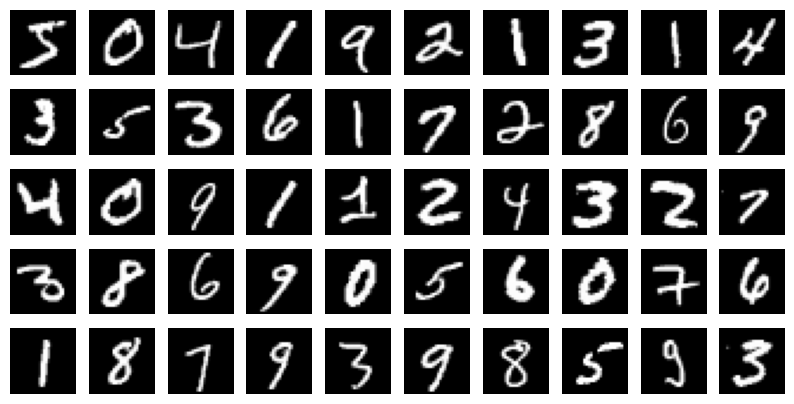

In [4]:
# here show 50 first of this images
def show_images(num_images,X):
    #inputs dataset and number of images wants to show
    #output plot images
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(5, 10, i + 1)
        plt.imshow(X[i] / 255.0, cmap='gray')
        plt.axis('off')
    plt.show()
show_images(50,x_train)

In [5]:
#scale the data set to [0 1]
#divide data to maximum value .
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()
x_train_reshaped = x_train.reshape(60000, 784)
x_test_reshaped = x_test.reshape(10000, 784)

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [6]:
#calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
covariance = np.cov(x_train_reshaped.T)

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [7]:
explained_variance = 0.7
U, S, Vh = np.linalg.svd(covariance, full_matrices=True)
## you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
NormSumOfS = np.cumsum(S)/np.sum(S)
index = np.argmax(NormSumOfS > explained_variance)
V = Vh.T


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

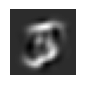

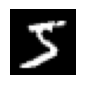

In [8]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select one sample and reshape it to a 28 by 28 matrix and plot them as image
F = np.dot(np.dot(x_train_reshaped,V[:, :index]), V[:, :index].T)
#plot the dimentionally reduced data
#plot the original data
F_reshaped = F.reshape(60000, 28, 28)
show_images(1,F_reshaped)
show_images(1,x_train)

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [9]:
from sklearn.decomposition import PCA

def do_pca(n_components, data, data1):
    # Create a PCA instance with the desired number of components
    pca = PCA(n_components=n_components)

    # Fit the PCA model to your data and transform the data
    projected_data = pca.fit_transform(data)
    projected_data1 = pca.transform(data1)
    return projected_data, projected_data1


In [10]:
from sklearn.ensemble import RandomForestClassifier  # For classification tasks
from sklearn.metrics import accuracy_score

def ML_model(X_train, X_test, Y_train, Y_test, print_output=True):
    # You can configure the model by setting hyperparameters such as the number of trees, max depth, etc.
    model = RandomForestClassifier(n_estimators=100)  # For classification
    # model = RandomForestRegressor(n_estimators=100)  # For regression

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    Y_pred = model.predict(X_test)

    # Calculate the accuracy of the model
    acc = accuracy_score(Y_test, Y_pred)

    if print_output:
        print(f"Accuracy: {acc * 100:.2f}%")

    return acc



In [11]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy and number of components
acc_list, pc_list = [], []

for pc in range(2, 101):
    # Perform PCA with the current number of components
    projected_train_data, projected_test_data = do_pca(pc, x_train_reshaped, x_test_reshaped)

    # Train the SVM model and calculate accuracy
    accuracy = ML_model(projected_train_data, projected_test_data, y_train, y_test, print_output=False)

    # Append the accuracy and number of components to the lists
    acc_list.append(accuracy)
    pc_list.append(pc)


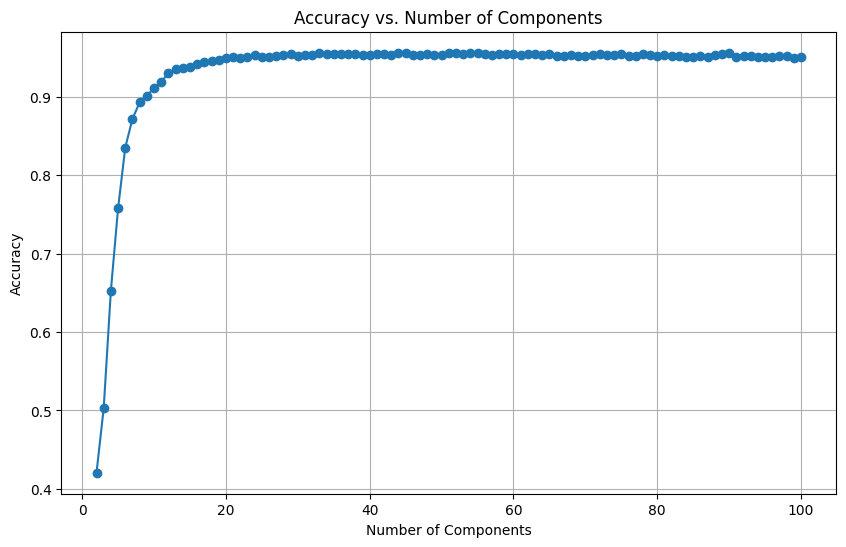

In [17]:

# Plot the accuracy vs. number of components
plt.figure(figsize=(10, 6))
plt.plot(pc_list, acc_list, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [19]:
#print the number of components that maximize the accuracy and the max accuracy
max_index = acc_list.index(max(acc_list))

print("Index of maximum value:", max_index+2)

print("Index of maximum value:", max(acc_list))

Index of maximum value: 51
Index of maximum value: 0.9564
